In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-04-24 16:07:21.970175: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:07:21.975743: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-24 16:07:22.045218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-24 16:07:24.042375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


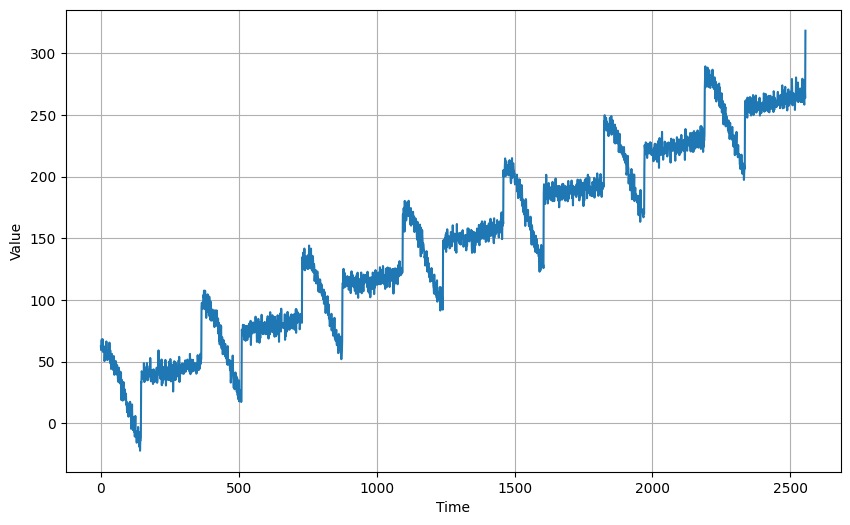

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format - line style when plotting the graph
      label - tag for the line
      start - first time step to plot
      end - last time step to plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    if type(series) is tuple:

      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

def trend(time, slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """

    # Compute the linear series given the slope
    series = slope * time

    return series

def seasonal_pattern(season_time):
    """
    Just an arbitrary pattern, you can change it if you wish

    Args:
      season_time (array of float) - contains the measurements per time step

    Returns:
      data_pattern (array of float) -  contains revised measurement values according
                                  to the defined pattern
    """

    # Generate the values using an arbitrary pattern
    data_pattern = np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

    return data_pattern

def seasonality(time, period, amplitude=1, phase=0):
    """
    Repeats the same pattern at each period

    Args:
      time (array of int) - contains the time steps
      period (int) - number of time steps before the pattern repeats
      amplitude (int) - peak measured value in a period
      phase (int) - number of time steps to shift the measured values

    Returns:
      data_pattern (array of float) - seasonal data scaled by the defined amplitude
    """

    # Define the measured values per period
    season_time = ((time + phase) % period) / period

    # Generates the seasonal data scaled by the defined amplitude
    data_pattern = amplitude * seasonal_pattern(season_time)

    return data_pattern

def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal
    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level

    return noise


time = np.arange(7 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 50
slope = 0.1
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

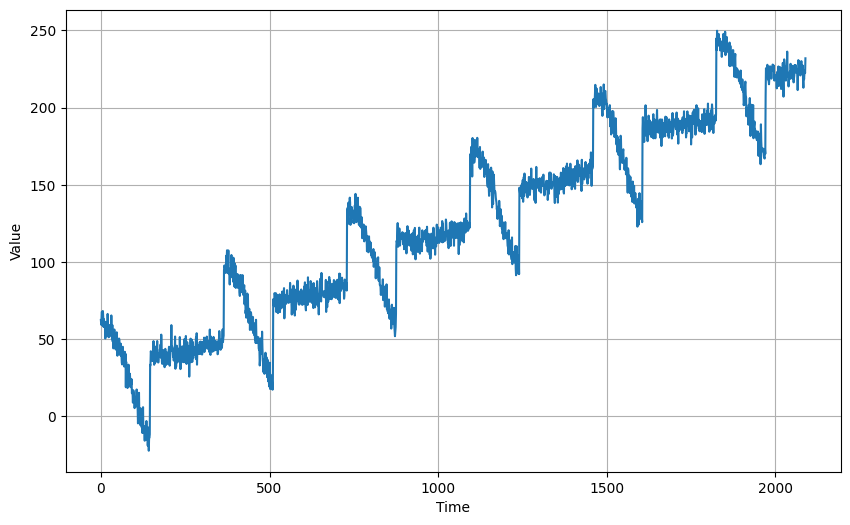

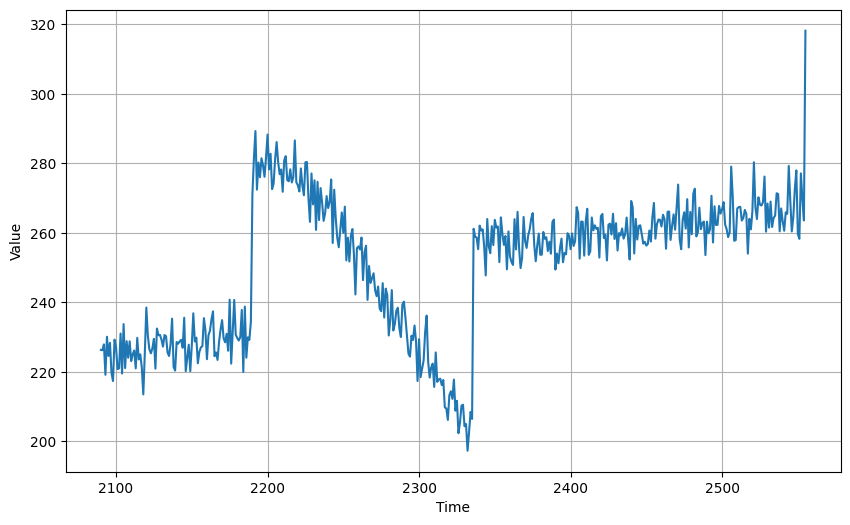

In [3]:
split_time = 365*6-100

# Get the train set
time_train = time[:split_time]
x_train = series[:split_time]

# Get the validation set
time_valid = time[split_time:]
x_valid = series[split_time:]

plot_series(time_train, x_train)
plot_series(time_valid, x_valid)

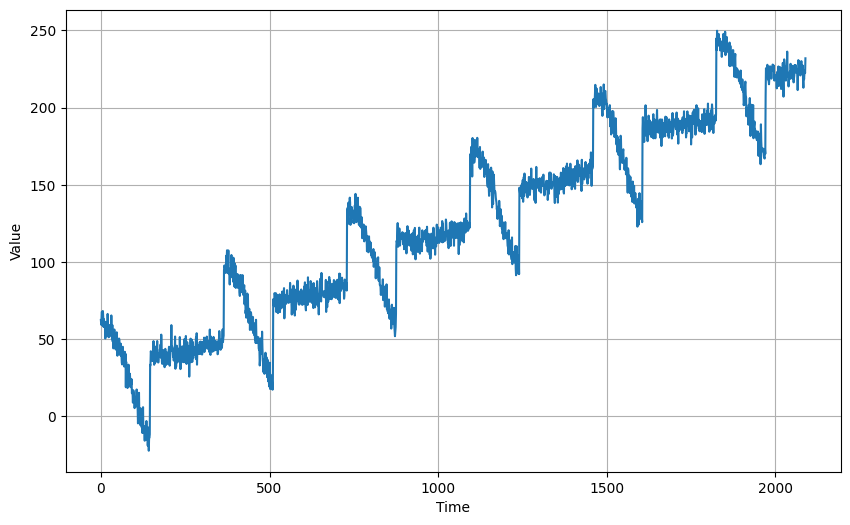

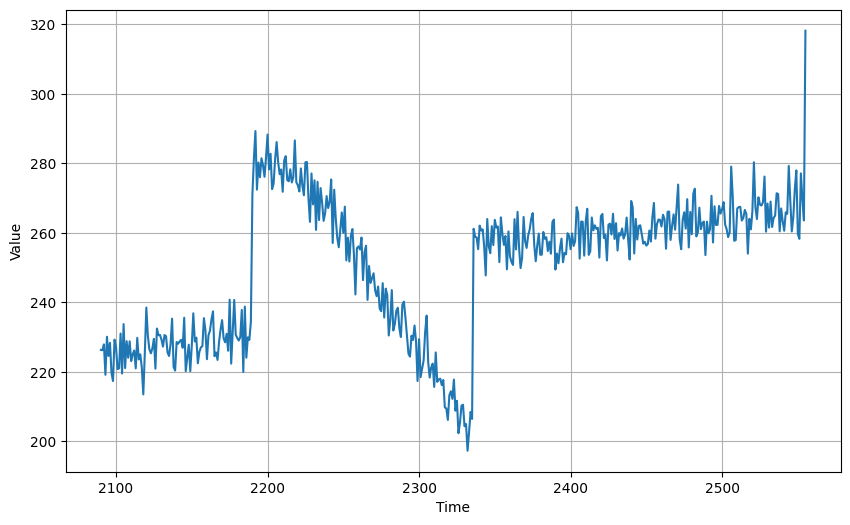

In [4]:
x_train_reshaped = x_train.reshape(-1, 1)
x_valid_reshaped = x_valid.reshape(-1, 1)
plot_series(time_train, x_train_reshaped)
plot_series(time_valid, x_valid_reshaped)

In [5]:
window_size = 30

x_train_window =[]
y_train_window =[]
x_valid_window =[]
y_valid_window =[]

for i in range (window_size, split_time):
    x_train_window.append(x_train_reshaped[i-window_size:i, 0])
    y_train_window.append(x_train_reshaped[i, 0])



for i in range (window_size,time_valid.shape[0] ):
  x_valid_window.append(x_valid_reshaped[i-window_size:i,0])
  y_valid_window.append(x_valid_reshaped[i,0])

X_train, y_train, X_valid, y_valid = np.array(x_train_window), np.array(y_train_window), np.array(x_valid_window), np.array(y_valid_window)

2024-04-24 16:07:28.077952: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-24 16:07:28.078985: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/p/pakrit/pytorchRL/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 18918.0176 - mean_absolute_error: 122.1758 - val_loss: 59692.9297 - val_mean_absolute_error: 243.5430
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 17102.6582 - mean_absolute_error: 115.3463 - val_loss: 58331.2969 - val_mean_absolute_error: 240.7313
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 16669.5820 - mean_absolute_error: 113.9116 - val_loss: 57405.4688 - val_mean_absolute_error: 238.8006
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 16216.9863 - mean_absolute_error: 111.7383 - val_loss: 56564.7461 - val_mean_absolute_error: 237.0337
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 15335.3291 - mean_absolute_error: 108.3745 - val_loss: 55764.0000 - val_mean_absolute_error: 235.3386
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 14792.5000 - mean_absolute_error: 105.8348 - val_loss: 54981.1367 - val_mean_absolute_error: 233.6694
Epoch 7/1000
33/33 ━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 7407.1597 - mean_absolute_error: 70.6081 - val_loss: 34220.3008 - val_mean_absolute_error: 183.9580
Epoch 43/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 6934.3179 - mean_absolute_error: 68.2785 - val_loss: 33766.0898 - val_mean_absolute_error: 182.7193
Epoch 44/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 7187.6797 - mean_absolute_error: 69.3355 - val_loss: 33329.3320 - val_mean_absolute_error: 181.5202
Epoch 45/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6912.4355 - mean_absolute_error: 68.5315 - val_loss: 32898.1680 - val_mean_absolute_error: 180.3286
Epoch 46/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6600.5513 - mean_absolute_error: 67.1545 - val_loss: 32473.1895 - val_mean_absolute_error: 179.1464
Epoch 47/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 6357.6860 - mean_absolute_error: 64.7440 - val_loss: 32068.3340 - val_mean_absolute_error: 178.0128
Epoch 48/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2

Epoch 84/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4319.6353 - mean_absolute_error: 55.8198 - val_loss: 21479.6309 - val_mean_absolute_error: 145.2580
Epoch 85/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4329.4150 - mean_absolute_error: 55.6760 - val_loss: 21291.7461 - val_mean_absolute_error: 144.6098
Epoch 86/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4312.6060 - mean_absolute_error: 55.4487 - val_loss: 21114.6719 - val_mean_absolute_error: 143.9962
Epoch 87/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 4103.5376 - mean_absolute_error: 54.0476 - val_loss: 20949.3105 - val_mean_absolute_error: 143.4209
Epoch 88/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4196.7222 - mean_absolute_error: 54.7982 - val_loss: 20777.4512 - val_mean_absolute_error: 142.8205
Epoch 89/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4133.2085 - mean_absolute_error: 54.3121 - val_loss: 20604.4199 - val_mean_absolute_error: 142.2134
Epoch 90/1000
33/33 ━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1453.7340 - mean_absolute_error: 25.8483 - val_loss: 13286.0352 - val_mean_absolute_error: 113.6058
Epoch 126/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1443.2966 - mean_absolute_error: 25.6264 - val_loss: 13035.3789 - val_mean_absolute_error: 112.4972
Epoch 127/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1305.0059 - mean_absolute_error: 24.2988 - val_loss: 12794.7822 - val_mean_absolute_error: 111.4227
Epoch 128/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1296.5244 - mean_absolute_error: 24.4947 - val_loss: 12550.4131 - val_mean_absolute_error: 110.3207
Epoch 129/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1210.0278 - mean_absolute_error: 23.4264 - val_loss: 12316.4980 - val_mean_absolute_error: 109.2554
Epoch 130/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1341.7086 - mean_absolute_error: 25.0585 - val_loss: 12085.7451 - val_mean_absolute_error: 108.1942
Epoch 131/1000
33/33 ━━━━━━━━━━━━━━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 512.3835 - mean_absolute_error: 15.1287 - val_loss: 6352.2529 - val_mean_absolute_error: 77.2820
Epoch 168/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 471.0578 - mean_absolute_error: 14.8347 - val_loss: 6250.1665 - val_mean_absolute_error: 76.6186
Epoch 169/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 465.3556 - mean_absolute_error: 14.5259 - val_loss: 6148.1543 - val_mean_absolute_error: 75.9500
Epoch 170/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 435.1946 - mean_absolute_error: 14.0507 - val_loss: 6047.8003 - val_mean_absolute_error: 75.2864
Epoch 171/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 435.5960 - mean_absolute_error: 13.9134 - val_loss: 5948.4692 - val_mean_absolute_error: 74.6238
Epoch 172/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 445.1398 - mean_absolute_error: 14.2891 - val_loss: 5849.4771 - val_mean_absolute_error: 73.9576
Epoch 173/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step 

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 248.8995 - mean_absolute_error: 11.1962 - val_loss: 3384.4856 - val_mean_absolute_error: 54.8156
Epoch 210/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 210.5276 - mean_absolute_error: 10.5126 - val_loss: 3337.2900 - val_mean_absolute_error: 54.3856
Epoch 211/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 256.6771 - mean_absolute_error: 11.4290 - val_loss: 3287.4939 - val_mean_absolute_error: 53.9278
Epoch 212/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 228.8462 - mean_absolute_error: 10.8214 - val_loss: 3239.7275 - val_mean_absolute_error: 53.4850
Epoch 213/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 245.1425 - mean_absolute_error: 11.1798 - val_loss: 3193.7910 - val_mean_absolute_error: 53.0559
Epoch 214/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 217.5374 - mean_absolute_error: 10.6693 - val_loss: 3151.4507 - val_mean_absolute_error: 52.6571
Epoch 215/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step 

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 200.5730 - mean_absolute_error: 10.4283 - val_loss: 1897.2804 - val_mean_absolute_error: 39.3906
Epoch 252/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 172.9416 - mean_absolute_error: 9.7034 - val_loss: 1875.7864 - val_mean_absolute_error: 39.1584
Epoch 253/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 161.7891 - mean_absolute_error: 9.7032 - val_loss: 1871.6161 - val_mean_absolute_error: 39.2799
Epoch 254/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 185.5426 - mean_absolute_error: 10.1410 - val_loss: 1836.1741 - val_mean_absolute_error: 38.6347
Epoch 255/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 181.4548 - mean_absolute_error: 9.7759 - val_loss: 1829.9653 - val_mean_absolute_error: 38.6214
Epoch 256/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 178.3018 - mean_absolute_error: 9.7554 - val_loss: 1795.0756 - val_mean_absolute_error: 38.1695
Epoch 257/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - lo

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 144.6658 - mean_absolute_error: 8.9607 - val_loss: 1253.5197 - val_mean_absolute_error: 30.8853
Epoch 294/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 148.2183 - mean_absolute_error: 9.1444 - val_loss: 1246.0198 - val_mean_absolute_error: 30.8194
Epoch 295/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 166.5717 - mean_absolute_error: 9.6167 - val_loss: 1240.9386 - val_mean_absolute_error: 30.7293
Epoch 296/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 155.5815 - mean_absolute_error: 9.1716 - val_loss: 1225.7675 - val_mean_absolute_error: 30.3770
Epoch 297/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 174.5228 - mean_absolute_error: 9.8113 - val_loss: 1222.1437 - val_mean_absolute_error: 30.3973
Epoch 298/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 163.2000 - mean_absolute_error: 9.6261 - val_loss: 1215.6798 - val_mean_absolute_error: 30.2594
Epoch 299/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 147.5172 - mean_absolute_error: 9.0687 - val_loss: 1005.3591 - val_mean_absolute_error: 27.1771
Epoch 336/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 147.1909 - mean_absolute_error: 9.0246 - val_loss: 994.5322 - val_mean_absolute_error: 27.1203
Epoch 337/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 166.2876 - mean_absolute_error: 9.5624 - val_loss: 998.7312 - val_mean_absolute_error: 27.0876
Epoch 338/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 157.7781 - mean_absolute_error: 9.3252 - val_loss: 989.2523 - val_mean_absolute_error: 27.0283
Epoch 339/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 141.6527 - mean_absolute_error: 8.9684 - val_loss: 987.7443 - val_mean_absolute_error: 26.9110
Epoch 340/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 170.3916 - mean_absolute_error: 9.5344 - val_loss: 993.3256 - val_mean_absolute_error: 27.1707
Epoch 341/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 145

Epoch 378/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 146.8950 - mean_absolute_error: 9.0753 - val_loss: 804.5979 - val_mean_absolute_error: 24.0912
Epoch 379/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 146.7303 - mean_absolute_error: 9.2061 - val_loss: 803.9772 - val_mean_absolute_error: 24.0884
Epoch 380/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 143.7926 - mean_absolute_error: 8.8893 - val_loss: 802.0297 - val_mean_absolute_error: 24.0985
Epoch 381/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 158.1407 - mean_absolute_error: 9.2683 - val_loss: 805.8788 - val_mean_absolute_error: 24.4675
Epoch 382/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 152.8151 - mean_absolute_error: 9.4223 - val_loss: 815.9302 - val_mean_absolute_error: 24.2268
Epoch 383/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 141.6216 - mean_absolute_error: 8.9171 - val_loss: 811.9018 - val_mean_absolute_error: 24.6053
Epoch 384/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 144.0232 - mean_absolute_error: 8.9907 - val_loss: 836.5070 - val_mean_absolute_error: 24.7262
Epoch 421/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 144.2527 - mean_absolute_error: 8.9808 - val_loss: 771.5620 - val_mean_absolute_error: 23.6323
Epoch 422/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 144.9391 - mean_absolute_error: 9.0396 - val_loss: 799.1935 - val_mean_absolute_error: 24.4655
Epoch 423/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 152.7604 - mean_absolute_error: 9.2888 - val_loss: 768.5637 - val_mean_absolute_error: 23.5303
Epoch 424/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 141.6734 - mean_absolute_error: 8.7743 - val_loss: 771.8075 - val_mean_absolute_error: 23.8632
Epoch 425/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 146.6132 - mean_absolute_error: 8.9768 - val_loss: 758.7701 - val_mean_absolute_error: 23.3198
Epoch 426/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 148.

Epoch 463/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 148.3564 - mean_absolute_error: 9.1779 - val_loss: 702.4625 - val_mean_absolute_error: 22.4902
Epoch 464/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 141.1822 - mean_absolute_error: 9.1049 - val_loss: 687.8640 - val_mean_absolute_error: 22.2460
Epoch 465/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 147.3904 - mean_absolute_error: 8.9941 - val_loss: 694.0027 - val_mean_absolute_error: 22.8657
Epoch 466/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 152.0636 - mean_absolute_error: 9.1648 - val_loss: 702.8702 - val_mean_absolute_error: 22.6212
Epoch 467/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 135.6224 - mean_absolute_error: 8.7289 - val_loss: 699.7202 - val_mean_absolute_error: 22.5464
Epoch 468/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 143.7046 - mean_absolute_error: 8.8254 - val_loss: 679.7336 - val_mean_absolute_error: 22.1121
Epoch 469/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/s

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 128.2569 - mean_absolute_error: 8.5583 - val_loss: 641.6727 - val_mean_absolute_error: 21.4773
Epoch 506/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 146.6951 - mean_absolute_error: 9.0597 - val_loss: 634.5384 - val_mean_absolute_error: 21.2927
Epoch 507/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 147.3197 - mean_absolute_error: 9.0591 - val_loss: 652.2618 - val_mean_absolute_error: 21.7268
Epoch 508/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 154.9639 - mean_absolute_error: 9.3045 - val_loss: 664.8561 - val_mean_absolute_error: 21.9801
Epoch 509/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 152.3587 - mean_absolute_error: 9.0730 - val_loss: 666.5832 - val_mean_absolute_error: 21.9697
Epoch 510/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 139.3964 - mean_absolute_error: 8.6623 - val_loss: 639.8614 - val_mean_absolute_error: 21.4646
Epoch 511/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 155.

Epoch 548/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 133.1836 - mean_absolute_error: 8.6011 - val_loss: 644.8542 - val_mean_absolute_error: 21.4107
Epoch 549/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 149.7012 - mean_absolute_error: 9.1205 - val_loss: 715.4075 - val_mean_absolute_error: 22.6412
Epoch 550/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 140.9653 - mean_absolute_error: 8.7997 - val_loss: 618.2349 - val_mean_absolute_error: 21.0028
Epoch 551/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 127.9080 - mean_absolute_error: 8.3500 - val_loss: 638.7966 - val_mean_absolute_error: 21.4143
Epoch 552/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 134.4992 - mean_absolute_error: 8.5370 - val_loss: 736.9611 - val_mean_absolute_error: 23.4208
Epoch 553/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 135.1927 - mean_absolute_error: 8.7086 - val_loss: 672.2452 - val_mean_absolute_error: 22.0609
Epoch 554/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 130.6820 - mean_absolute_error: 8.4987 - val_loss: 667.8647 - val_mean_absolute_error: 22.0266
Epoch 591/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 142.2502 - mean_absolute_error: 8.9982 - val_loss: 736.9172 - val_mean_absolute_error: 23.2268
Epoch 592/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 145.5869 - mean_absolute_error: 8.9597 - val_loss: 651.6030 - val_mean_absolute_error: 21.6275
Epoch 593/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 146.1739 - mean_absolute_error: 8.8939 - val_loss: 713.1720 - val_mean_absolute_error: 22.7966
Epoch 594/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 142.1648 - mean_absolute_error: 8.8096 - val_loss: 703.0128 - val_mean_absolute_error: 22.5984
Epoch 595/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 132.2687 - mean_absolute_error: 8.5846 - val_loss: 637.2628 - val_mean_absolute_error: 21.3812
Epoch 596/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 139.

Epoch 633/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 144.9829 - mean_absolute_error: 8.8183 - val_loss: 714.7808 - val_mean_absolute_error: 22.7310
Epoch 634/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 147.8673 - mean_absolute_error: 8.9469 - val_loss: 798.8137 - val_mean_absolute_error: 24.4741
Epoch 635/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 152.5705 - mean_absolute_error: 9.1085 - val_loss: 821.6068 - val_mean_absolute_error: 24.8235
Epoch 636/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 118.2143 - mean_absolute_error: 8.2917 - val_loss: 733.1670 - val_mean_absolute_error: 22.9716
Epoch 637/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 150.6318 - mean_absolute_error: 9.0832 - val_loss: 762.1152 - val_mean_absolute_error: 23.5382
Epoch 638/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 146.7599 - mean_absolute_error: 9.1371 - val_loss: 733.7643 - val_mean_absolute_error: 23.1612
Epoch 639/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 139.8833 - mean_absolute_error: 8.9263 - val_loss: 600.5789 - val_mean_absolute_error: 21.0209
Epoch 676/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 144.8684 - mean_absolute_error: 8.8340 - val_loss: 581.5649 - val_mean_absolute_error: 20.3636
Epoch 677/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 130.8385 - mean_absolute_error: 8.5056 - val_loss: 607.1971 - val_mean_absolute_error: 20.7638
Epoch 678/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 129.0891 - mean_absolute_error: 8.5663 - val_loss: 617.5978 - val_mean_absolute_error: 21.0628
Epoch 679/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 131.5686 - mean_absolute_error: 8.4893 - val_loss: 620.9221 - val_mean_absolute_error: 21.2142
Epoch 680/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 139.6425 - mean_absolute_error: 8.7180 - val_loss: 607.6928 - val_mean_absolute_error: 20.7691
Epoch 681/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 141.

Epoch 718/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 135.1589 - mean_absolute_error: 8.6674 - val_loss: 586.1817 - val_mean_absolute_error: 20.3776
Epoch 719/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 156.1377 - mean_absolute_error: 9.2633 - val_loss: 562.8385 - val_mean_absolute_error: 19.9497
Epoch 720/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 127.6571 - mean_absolute_error: 8.5772 - val_loss: 562.6726 - val_mean_absolute_error: 20.0006
Epoch 721/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 148.8327 - mean_absolute_error: 8.7925 - val_loss: 611.5059 - val_mean_absolute_error: 21.1684
Epoch 722/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 141.5842 - mean_absolute_error: 9.0012 - val_loss: 595.1757 - val_mean_absolute_error: 20.5898
Epoch 723/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 135.9200 - mean_absolute_error: 8.5842 - val_loss: 623.8383 - val_mean_absolute_error: 21.7348
Epoch 724/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 139.4855 - mean_absolute_error: 8.5845 - val_loss: 632.9429 - val_mean_absolute_error: 21.3271
Epoch 761/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 132.7316 - mean_absolute_error: 8.5012 - val_loss: 624.9214 - val_mean_absolute_error: 21.4420
Epoch 762/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 138.2220 - mean_absolute_error: 8.7863 - val_loss: 538.7883 - val_mean_absolute_error: 19.6532
Epoch 763/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 132.7498 - mean_absolute_error: 8.7023 - val_loss: 632.5541 - val_mean_absolute_error: 21.6552
Epoch 764/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 152.2950 - mean_absolute_error: 9.1005 - val_loss: 607.3539 - val_mean_absolute_error: 20.8941
Epoch 765/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 140.5750 - mean_absolute_error: 8.8146 - val_loss: 638.2009 - val_mean_absolute_error: 21.4957
Epoch 766/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 148.

Epoch 803/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 133.2114 - mean_absolute_error: 8.7830 - val_loss: 550.7379 - val_mean_absolute_error: 19.6589
Epoch 804/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 145.8329 - mean_absolute_error: 8.8307 - val_loss: 602.5974 - val_mean_absolute_error: 21.0951
Epoch 805/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 127.4323 - mean_absolute_error: 8.5032 - val_loss: 610.2664 - val_mean_absolute_error: 21.0321
Epoch 806/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 131.0574 - mean_absolute_error: 8.4762 - val_loss: 636.8683 - val_mean_absolute_error: 21.4609
Epoch 807/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 135.6124 - mean_absolute_error: 8.8631 - val_loss: 660.3376 - val_mean_absolute_error: 21.6752
Epoch 808/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 129.8720 - mean_absolute_error: 8.4214 - val_loss: 614.0652 - val_mean_absolute_error: 20.8684
Epoch 809/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 129.3122 - mean_absolute_error: 8.3770 - val_loss: 589.2672 - val_mean_absolute_error: 20.5222
Epoch 846/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 129.5889 - mean_absolute_error: 8.4171 - val_loss: 574.3237 - val_mean_absolute_error: 20.3625
Epoch 847/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 139.0070 - mean_absolute_error: 8.7321 - val_loss: 600.2594 - val_mean_absolute_error: 20.7767
Epoch 848/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 139.3522 - mean_absolute_error: 8.7521 - val_loss: 626.6361 - val_mean_absolute_error: 21.4164
Epoch 849/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 142.9061 - mean_absolute_error: 8.9426 - val_loss: 786.6646 - val_mean_absolute_error: 23.8518
Epoch 850/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 128.2533 - mean_absolute_error: 8.3801 - val_loss: 882.6324 - val_mean_absolute_error: 25.7959
Epoch 851/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 134.

Epoch 888/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 132.2150 - mean_absolute_error: 8.5747 - val_loss: 738.3668 - val_mean_absolute_error: 23.2220
Epoch 889/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 123.7284 - mean_absolute_error: 8.3423 - val_loss: 792.5862 - val_mean_absolute_error: 24.0200
Epoch 890/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 128.6048 - mean_absolute_error: 8.4576 - val_loss: 746.6440 - val_mean_absolute_error: 23.3417
Epoch 891/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 134.0556 - mean_absolute_error: 8.7690 - val_loss: 777.5760 - val_mean_absolute_error: 24.0564
Epoch 892/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 140.4137 - mean_absolute_error: 8.7739 - val_loss: 773.2993 - val_mean_absolute_error: 23.7922
Epoch 893/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 130.4075 - mean_absolute_error: 8.5488 - val_loss: 715.9445 - val_mean_absolute_error: 23.1331
Epoch 894/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/st

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 135.4142 - mean_absolute_error: 8.6708 - val_loss: 536.5081 - val_mean_absolute_error: 19.4715
Epoch 931/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 131.0284 - mean_absolute_error: 8.3857 - val_loss: 499.5452 - val_mean_absolute_error: 19.3500
Epoch 932/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 123.5300 - mean_absolute_error: 8.1907 - val_loss: 647.2202 - val_mean_absolute_error: 21.4993
Epoch 933/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 133.8989 - mean_absolute_error: 8.7009 - val_loss: 570.3395 - val_mean_absolute_error: 20.1562
Epoch 934/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 139.5491 - mean_absolute_error: 8.7547 - val_loss: 604.1386 - val_mean_absolute_error: 21.5368
Epoch 935/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 140.0852 - mean_absolute_error: 8.6263 - val_loss: 590.2770 - val_mean_absolute_error: 20.5974
Epoch 936/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 134.

Epoch 973/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 143.4997 - mean_absolute_error: 8.8392 - val_loss: 618.1102 - val_mean_absolute_error: 20.9660
Epoch 974/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 151.7684 - mean_absolute_error: 8.9553 - val_loss: 626.2469 - val_mean_absolute_error: 21.2124
Epoch 975/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 141.3295 - mean_absolute_error: 8.8639 - val_loss: 508.8655 - val_mean_absolute_error: 18.9034
Epoch 976/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 134.2439 - mean_absolute_error: 8.4619 - val_loss: 547.3301 - val_mean_absolute_error: 19.7033
Epoch 977/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 126.3669 - mean_absolute_error: 8.4664 - val_loss: 568.5773 - val_mean_absolute_error: 20.0957
Epoch 978/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 135.2268 - mean_absolute_error: 8.6159 - val_loss: 513.8103 - val_mean_absolute_error: 19.0139
Epoch 979/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/st

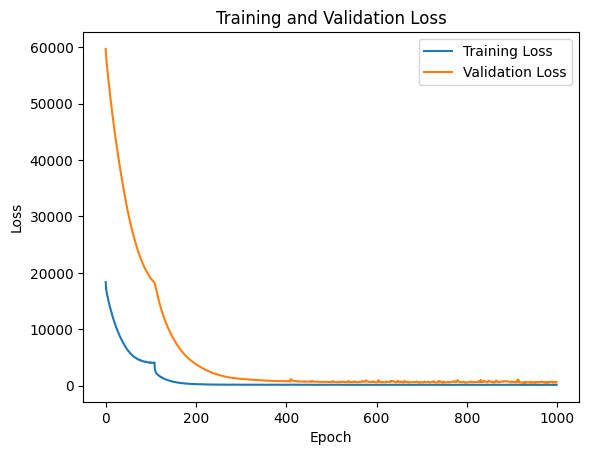

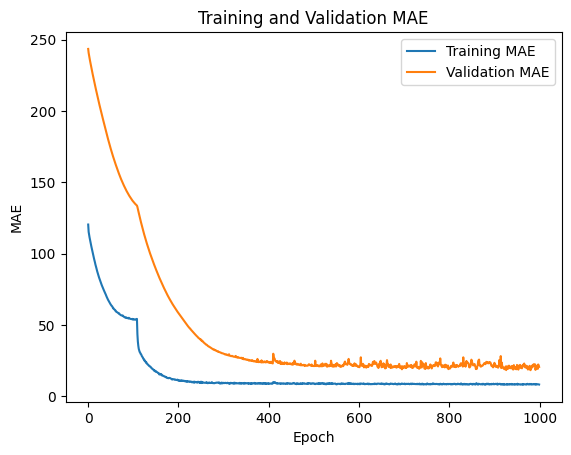

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.metrics import MeanAbsoluteError
from keras.callbacks import ModelCheckpoint

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



# Fit the model with the LossPlotter callback

# Compile the model with Adam optimizer and specific learning rate
optimizer = Adam()
regressor.compile(optimizer=optimizer, loss='mean_squared_error', metrics= [MeanAbsoluteError()])
# Define a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_LSTM5.keras', monitor='val_mean_absolute_error', mode='min', save_best_only=True)

# Fitting the RNN to the Training set with the ModelCheckpoint callback
history = regressor.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_valid, y_valid), verbose=1, callbacks=[checkpoint])

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

In [7]:
# Find the epoch for the lowest MAE for training and validation
min_train_mae = min(history.history['mean_absolute_error'])
min_val_mae = min(history.history['val_mean_absolute_error'])

min_train_loss = min(history.history['loss'])
min_val_loss = min(history.history['val_loss'])

min_train_mae_epoch = history.history['mean_absolute_error'].index(min_train_mae) + 1
min_val_mae_epoch = history.history['val_mean_absolute_error'].index(min_val_mae) + 1

# Find the epoch for the lowest loss for training and validation
min_train_loss_epoch = history.history['loss'].index(min_train_loss) + 1
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss) + 1

print("Lowest MAE for training: {:.4f} at epoch {}".format(min_train_mae, min_train_mae_epoch))
print("Lowest MAE for validation: {:.4f} at epoch {}".format(min_val_mae, min_val_mae_epoch))

print("Lowest loss for training: {:.4f} at epoch {}".format(min_train_loss, min_train_loss_epoch))
print("Lowest loss for validation: {:.4f} at epoch {}".format(min_val_loss, min_val_loss_epoch))


Lowest MAE for training: 8.0918 at epoch 964
Lowest MAE for validation: 18.4058 at epoch 981
Lowest loss for training: 121.4671 at epoch 964
Lowest loss for validation: 488.3448 at epoch 927


In [8]:
from keras.models import load_model
loaded_model = load_model ('best_model_LSTM5.keras')

loss, mae = loaded_model.evaluate(X_valid, y_valid)

print("Validation Loss:", loss)
print("Validation Mean Absolute Error:", mae)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 415.3771 - mean_absolute_error: 14.9435
Validation Loss: 492.97186279296875
Validation Mean Absolute Error: 18.40584373474121


In [9]:
y_pred = loaded_model.predict(X_valid)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


In [10]:
y_pred [0]

array([223.00966], dtype=float32)

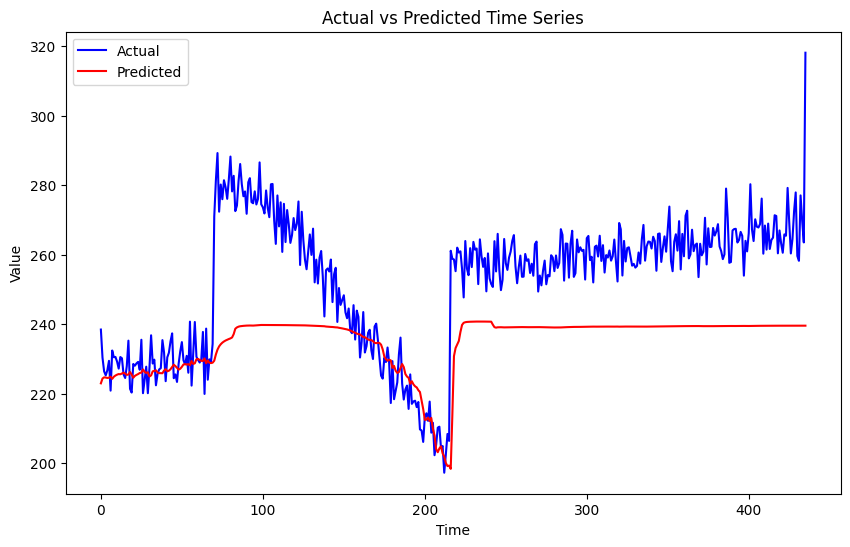

In [11]:
import matplotlib.pyplot as plt

# Assuming timestamps are available for both y_pred and y_valid
timestamps = range(len(y_valid))

# Plot y_pred vs y_valid
plt.figure(figsize=(10, 6))
plt.plot(timestamps, y_valid, label='Actual', color='blue')
plt.plot(timestamps, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
